In [7]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define stock tickers and time period
stocks = ["BHP.AX", "RIO.AX", "FMG.AX", "S32.AX", "MIN.AX", "NST.AX", "PLS.AX", "IGO.AX", "WHC.AX"]
start_date = "2020-01-01"
end_date = "2025-01-01"

# Create a DataFrame to store financial metrics
financial_metrics = pd.DataFrame(columns=["Ticker", "ROE", "EPS Growth", "P/E Ratio", "Debt-to-Equity"])

# Fetch data for each stock
for ticker in stocks:
    print(f"Fetching data for {ticker}...")
    try:
        stock = yf.Ticker(ticker)
        roe = stock.info.get("returnOnEquity", None)
        eps_growth = stock.info.get("earningsGrowth", None)
        pe_ratio = stock.info.get("forwardPE", None)
        debt_to_equity = stock.info.get("debtToEquity", None)
        
        # Print fetched values for debugging
        print(f"Data for {ticker}: ROE={roe}, EPS Growth={eps_growth}, P/E={pe_ratio}, Debt-to-Equity={debt_to_equity}")
        
        financial_metrics = pd.concat([financial_metrics, pd.DataFrame([{
            "Ticker": ticker,
            "ROE": roe,
            "EPS Growth": eps_growth,
            "P/E Ratio": pe_ratio,
            "Debt-to-Equity": debt_to_equity
        }])], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Clean and preprocess data
financial_metrics.dropna(inplace=True)  # Remove rows with missing values
financial_metrics["EPS Growth"] *= 100  # Convert EPS growth to percentage


Fetching data for BHP.AX...
Data for BHP.AX: ROE=0.19664, EPS Growth=0.077, P/E=18.05637, Debt-to-Equity=45.259
Fetching data for RIO.AX...


/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/4114082199.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_metrics = pd.concat([financial_metrics, pd.DataFrame([{


Data for RIO.AX: ROE=0.19718, EPS Growth=0.133, P/E=16.947784, Debt-to-Equity=25.014
Fetching data for FMG.AX...
Data for FMG.AX: ROE=0.30185, EPS Growth=-0.036, P/E=18.319174, Debt-to-Equity=27.648
Fetching data for S32.AX...
Data for S32.AX: ROE=-0.06977, EPS Growth=None, P/E=12.919755, Debt-to-Equity=17.456
Fetching data for MIN.AX...
Data for MIN.AX: ROE=0.03209, EPS Growth=None, P/E=13.926277, Debt-to-Equity=148.884
Fetching data for NST.AX...
Data for NST.AX: ROE=0.073920004, EPS Growth=-0.176, P/E=12.262073, Debt-to-Equity=15.292
Fetching data for PLS.AX...
Data for PLS.AX: ROE=0.07744, EPS Growth=-0.968, P/E=24.418962, Debt-to-Equity=17.131
Fetching data for IGO.AX...
Data for IGO.AX: ROE=0.0008, EPS Growth=None, P/E=27.59849, Debt-to-Equity=1.517
Fetching data for WHC.AX...
Data for WHC.AX: ROE=0.06741, EPS Growth=-0.885, P/E=7.5060935, Debt-to-Equity=35.876


In [8]:
# Clean and preprocess data
financial_metrics.dropna(inplace=True)  # Remove rows with missing values
financial_metrics["EPS Growth"] *= 100  # Convert EPS growth to percentage

# Display the DataFrame
print(financial_metrics)

# Save the DataFrame to a CSV
financial_metrics.to_csv("financial_metrics.csv", index=False)

   Ticker      ROE  EPS Growth  P/E Ratio  Debt-to-Equity
0  BHP.AX  0.19664       770.0  18.056370          45.259
1  RIO.AX  0.19718      1330.0  16.947784          25.014
2  FMG.AX  0.30185      -360.0  18.319174          27.648
5  NST.AX  0.07392     -1760.0  12.262073          15.292
6  PLS.AX  0.07744     -9680.0  24.418962          17.131
8  WHC.AX  0.06741     -8850.0   7.506094          35.876


/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/3904995636.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=financial_metrics, x="Ticker", y="ROE", palette="viridis")
/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/3904995636.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=financial_metrics, x="Ticker", y="EPS Growth", palette="coolwarm")
/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/3904995636.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=financial_metrics, y

Text(0, 0.5, 'Debt-to-Equity Ratio')

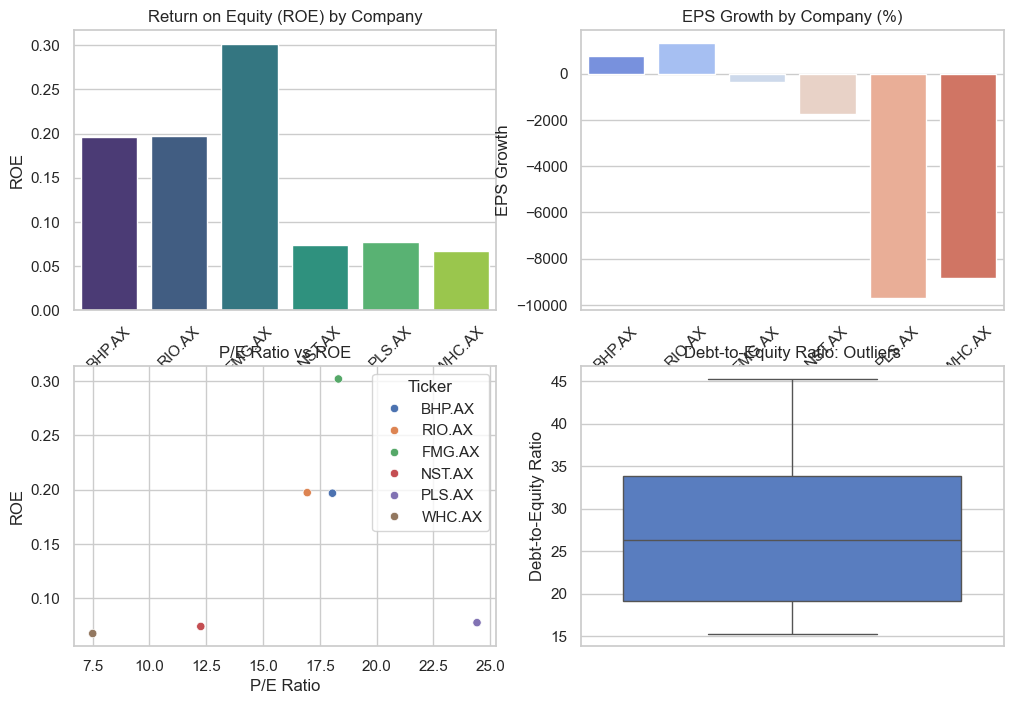

In [13]:
# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# **1. Visualize ROE and EPS Growth Over Time**
plt.subplot(2, 2, 1)
sns.barplot(data=financial_metrics, x="Ticker", y="ROE", palette="viridis")
plt.title("Return on Equity (ROE) by Company")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(data=financial_metrics, x="Ticker", y="EPS Growth", palette="coolwarm")
plt.title("EPS Growth by Company (%)")
plt.xticks(rotation=45)

# **2. Analyze Correlation Between P/E Ratio and ROE**
plt.subplot(2, 2, 3)
sns.scatterplot(data=financial_metrics, x="P/E Ratio", y="ROE", hue="Ticker", palette="deep")
plt.title("P/E Ratio vs ROE")
plt.xlabel("P/E Ratio")
plt.ylabel("ROE")

# **3. Highlight Outliers in Debt-to-Equity**
plt.subplot(2, 2, 4)
sns.boxplot(data=financial_metrics, y="Debt-to-Equity", palette="muted")
plt.title("Debt-to-Equity Ratio: Outliers")
plt.ylabel("Debt-to-Equity Ratio")


In [14]:
# Descriptive Statistics
print(financial_metrics.dtypes)

Ticker             object
ROE               float64
EPS Growth        float64
P/E Ratio         float64
Debt-to-Equity    float64
dtype: object


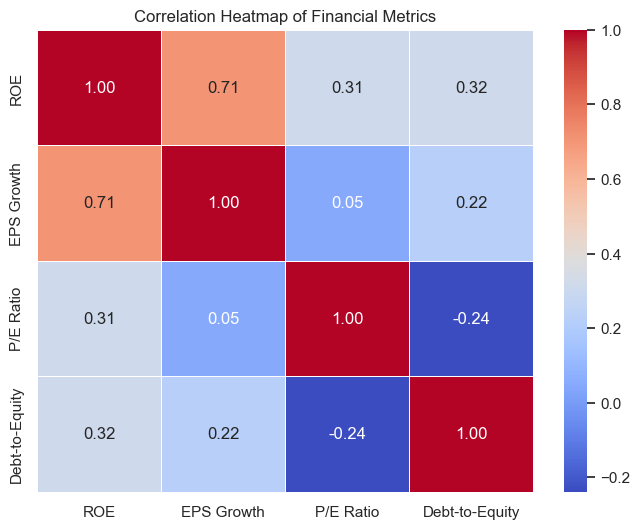

In [15]:
# Calculate the correlation matrix for the financial metrics
correlation_matrix = financial_metrics.iloc[:, 1:].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Financial Metrics")
plt.show()


/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/2281163801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=financial_metrics, x="Ticker", y="ROE", palette="viridis")


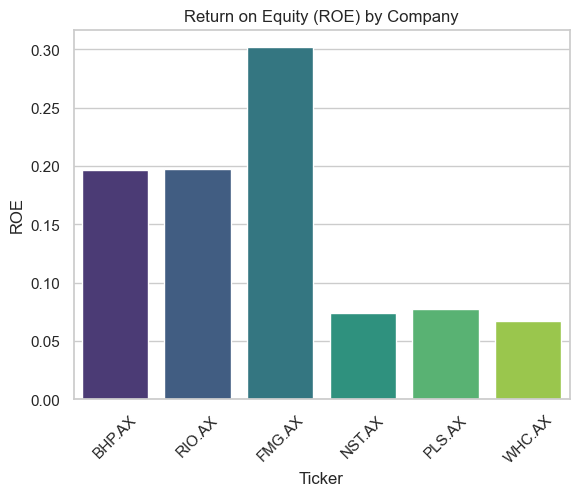

In [18]:

# **1. Visualize ROE and EPS Growth Over Time**

sns.barplot(data=financial_metrics, x="Ticker", y="ROE", palette="viridis")
plt.title("Return on Equity (ROE) by Company")
plt.xticks(rotation=45)

plt.show()

/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/2234099410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=financial_metrics, x="Ticker", y="EPS Growth", palette="coolwarm")


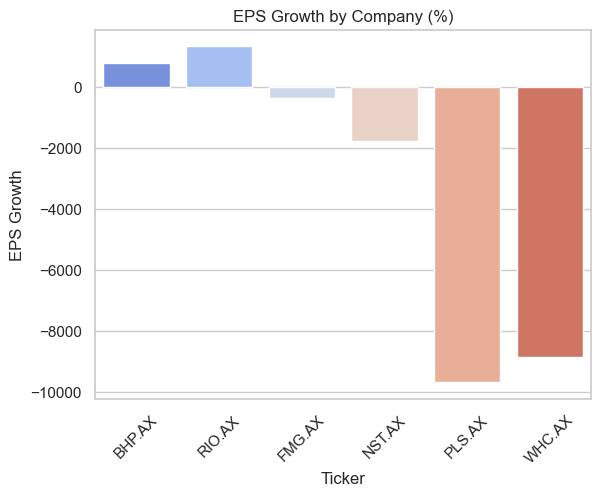

In [19]:

sns.barplot(data=financial_metrics, x="Ticker", y="EPS Growth", palette="coolwarm")
plt.title("EPS Growth by Company (%)")
plt.xticks(rotation=45)

plt.show()


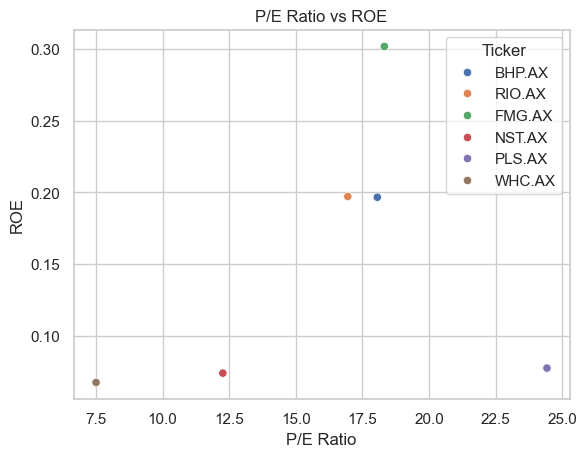

In [21]:
# **2. Analyze Correlation Between P/E Ratio and ROE**

sns.scatterplot(data=financial_metrics, x="P/E Ratio", y="ROE", hue="Ticker", palette="deep")
plt.title("P/E Ratio vs ROE")
plt.xlabel("P/E Ratio")
plt.ylabel("ROE")
plt.show()

/var/folders/46/fq89k40n6xg20hmwlktczzy40000gn/T/ipykernel_17170/521201884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=financial_metrics, y="Debt-to-Equity", palette="muted")


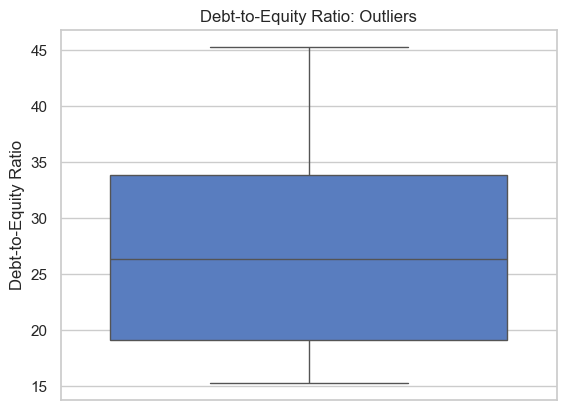

In [23]:

sns.boxplot(data=financial_metrics, y="Debt-to-Equity", palette="muted")
plt.title("Debt-to-Equity Ratio: Outliers")
plt.ylabel("Debt-to-Equity Ratio")
plt.show()